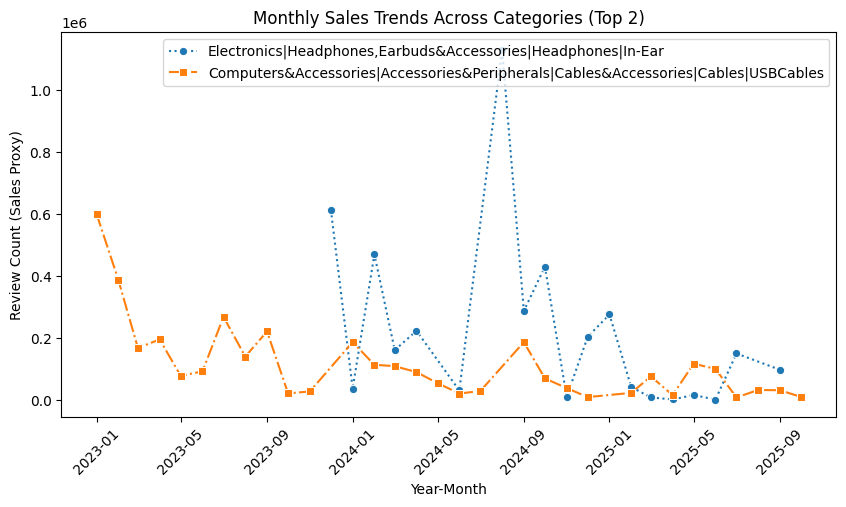

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("amazon.csv")

# Convert rating_count to numeric (remove commas)
df["rating_count"] = df["rating_count"].astype(str).str.replace(",", "").astype(float)

# Create a synthetic date index assuming daily data
df["Date"] = pd.date_range(start="2023-01-01", periods=len(df), freq="D")

# Aggregate data by month
df["Year-Month"] = df["Date"].dt.to_period("M")

# Check if category column exists
if "category" in df.columns:
    # Group by category and month
    df_grouped = df.groupby(["Year-Month", "category"])["rating_count"].sum().unstack()

    # Select top 2 categories with highest total review count
    top_categories = df_grouped.sum().nlargest(2).index
    df_filtered = df_grouped[top_categories]

    # Convert index back to datetime for plotting
    df_filtered.index = df_filtered.index.to_timestamp()

    # Plot multi-line time series chart
    plt.figure(figsize=(10, 5))
    markers = ["o", "s"]  # Different markers for each category
    linestyles = ["dotted", "dashdot"]

    for i, category in enumerate(top_categories):
        sns.lineplot(data=df_filtered, x=df_filtered.index, y=category, marker=markers[i], linestyle=linestyles[i], label=category)

    # Formatting the chart
    plt.xlabel("Year-Month")
    plt.ylabel("Review Count (Sales Proxy)")
    plt.title("Monthly Sales Trends Across Categories (Top 2)")
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

else:
    print("No category column found in the dataset. Please confirm the correct data structure.")
